In [88]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from lazypredict.Supervised import LazyRegressor

In [57]:
df = pd.read_csv('StudentScore.xls')

In [58]:
# check data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [59]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


## Data visualization

In [60]:
correlation = df.corr()
correlation

C:\Users\84949\AppData\Local\Temp\ipykernel_6408\3035769115.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


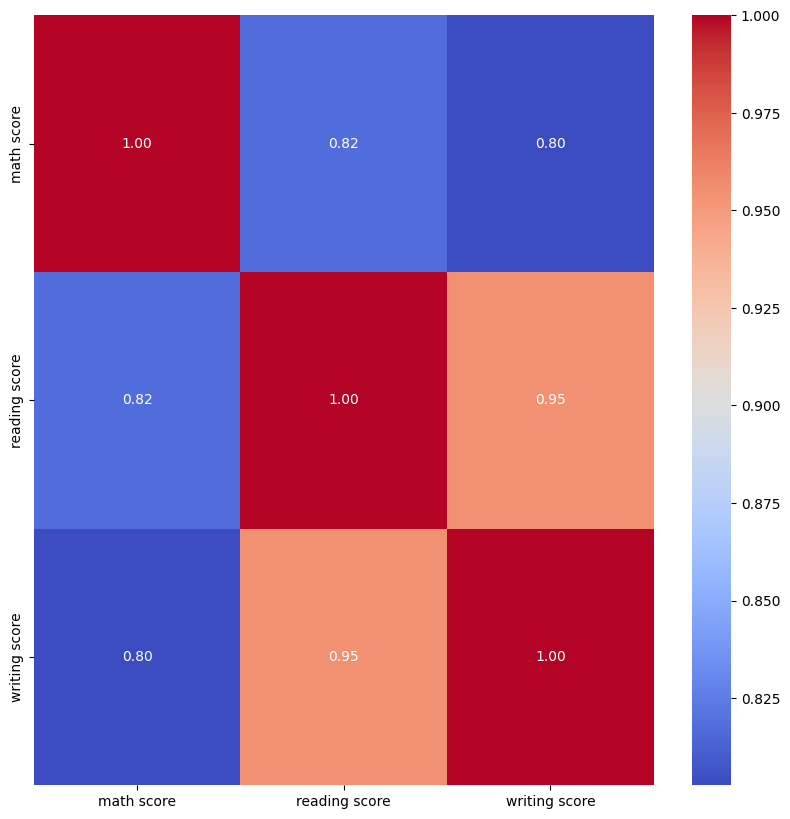

In [61]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation, annot= True, fmt=".2f", cmap= "coolwarm")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

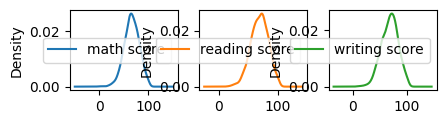

In [62]:
df.plot(kind= "density", subplots= True, layout=(4,4), sharex=False)
plt.show

array([[<AxesSubplot: title={'center': 'math score'}>,
        <AxesSubplot: title={'center': 'reading score'}>],
       [<AxesSubplot: title={'center': 'writing score'}>,
        <AxesSubplot: >]], dtype=object)

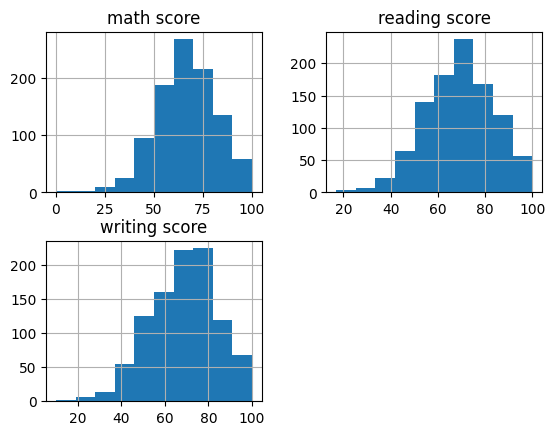

In [63]:
df.hist()

math score          AxesSubplot(0.125,0.653529;0.227941x0.226471)
reading score    AxesSubplot(0.398529,0.653529;0.227941x0.226471)
writing score    AxesSubplot(0.672059,0.653529;0.227941x0.226471)
dtype: object

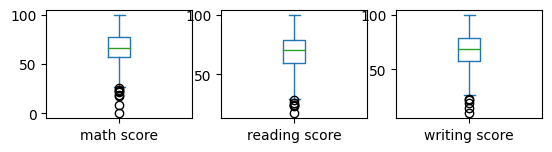

In [64]:
df.plot(kind='box', subplots= True, layout=(3,3), sharex= False)

In [65]:
target = 'math score'
y = df[target]
x = df.drop(target, axis= 1)

In [66]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 42)



In [67]:
num_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])


In [68]:
education_values = ["high school", "some high school", "some college", "associate's degree", "bachelor's degree",
                    "master's degree"]
gender_values = ["female", "male"]
lunch_values = df["lunch"].unique()
test_values = df["test preparation course"].unique()



In [69]:
ord_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")), 
    ("encoder", OrdinalEncoder(categories=[education_values, gender_values, lunch_values, test_values]))
])

In [70]:
nom_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")), 
    ("encoder", OneHotEncoder(sparse=True))
])

In [71]:

preprocessor = ColumnTransformer(transformers=[
    ("num_features", num_transformer, ["reading score", "writing score"]),
    ("ord_features", ord_transformer, ["parental level of education", "gender", "lunch", "test preparation course"]),
    ("nom_features", nom_transformer, ["race/ethnicity"]),
])

In [72]:
reg = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", LinearRegression())
])


In [73]:

pra_grid = {
            'preprocessor__num_features__imputer__strategy' : ['mean','median']
            }

In [87]:
reg_cv2 = RandomizedSearchCV(reg,param_distributions= pra_grid,
                             scoring= 'r2',
                              verbose= 1,
                               cv = 6,
                                n_iter= 20)
# randomizedsearch : find the best value among n random values

In [76]:
reg_cv = GridSearchCV(reg,
                   param_grid= pra_grid,
                   scoring= 'r2',
                   verbose=1, # in ra số lượng dữ liệu 
                   cv= 6,#  cv : cross validation
                   n_jobs=1)

In [78]:
reg_cv.fit(x_train,y_train)

Fitting 6 folds for each of 2 candidates, totalling 12 fits


c:\Users\84949\anaconda3\envs\py39\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\84949\anaconda3\envs\py39\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\84949\anaconda3\envs\py39\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\84949\anaconda3\envs\py39\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in 

GridSearchCV(cv=6,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num_features',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['reading '
                                                                          'score',
                                                                          'writing '
                                                                          'score']),
                                                                        ('ord_features',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('encoder',
                                                                                          OrdinalEncoder(categories=[['high '
                                                                                                                      's...
                                                                          'of '
                                                                          'education',
                                                                          'gender',
                                                                          'lunch',
                                                                          'test '
                                                                          'preparation '
                                                                          'course']),
                                                                        ('nom_features',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('encoder',
                                                                                          OneHotEncoder(sparse=True))]),
                                                                         ['race/ethnicity'])])),
                                       ('model', LinearRegression())]),
             n_jobs=1,
             param_grid={'preprocessor__num_features__imputer__strategy': ['mean',
                                                                           'median']},
             scoring='r2', verbose=1)

In [82]:
pickle.dump(reg_cv, open('linear_regression.pkl','wb'))

In [83]:
load_model = pickle.load(open('linear_regression.pkl', 'rb'))



In [84]:
y_predict = load_model.predict(x_test)

In [22]:
print('R2: {}'.format(r2_score(y_test, y_predict)))
print('MSE : {}'.format(mean_squared_error(y_test, y_predict)))
print('MAE : {}'.format(mean_absolute_error(y_test, y_predict)))

R2: 0.8811447183648126
MSE : 28.922054064655903
MAE : 4.198409544331868


In [23]:
test = pd.DataFrame([["male", "group C", "some college", "standard", "completed", 80, 68]],
                    columns= ['gender', "race/ethnicity", "parental level of education", "lunch",
                               "test preparation course", "reading score", "writing score"])

In [24]:
pred = load_model.predict(test)
pred

array([73.55684202])

In [89]:
reg_lazy = Pipeline(steps= [
    ('preprocessor', preprocessor),
])

In [90]:
x_train = reg_lazy.fit_transform(x_train)
x_test = reg_lazy.transform(x_test)

c:\Users\84949\anaconda3\envs\py39\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [91]:
reg_lazy_pre = LazyRegressor(verbose= 0, ignore_warnings= False, custom_metric= None)
models, predictions = reg_lazy_pre.fit(x_train, x_test, y_train, y_test)


 45%|████▌     | 19/42 [00:01<00:01, 14.70it/s]c:\Users\84949\anaconda3\envs\py39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
 62%|██████▏   | 26/42 [00:03<00:03,  5.23it/s]c:\Users\84949\anaconda3\envs\py39\lib\site-packages\sklearn\linear_model\_quantile.py:186: FutureWarning: The default solver will change from 'interior-point' to 'highs' in version 1.4. Set `solver='highs'` or to the desired solver to silence this warning.
  warnings.warn(
100%|██████████| 42/42 [00:17<00:00,  2.34it/s]


In [92]:
predictions

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
SGDRegressor,0.87,0.88,5.36,0.01
HuberRegressor,0.87,0.88,5.37,0.02
ElasticNetCV,0.87,0.88,5.37,0.04
BayesianRidge,0.87,0.88,5.37,0.01
LassoCV,0.87,0.88,5.37,0.04
RidgeCV,0.87,0.88,5.37,0.01
Ridge,0.87,0.88,5.37,0.02
LarsCV,0.87,0.88,5.38,0.02
Lars,0.87,0.88,5.38,0.01
